# Preprocessing Train and Test datasets

In [1]:
#Import required libraries for pre-processing
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')
import nltk 
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shrey\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\shrey\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shrey\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\shrey\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [2]:
#lemmatization of 'review_text' column
def text_preprocess(stop_words,lem,df):
    for index,row in df.iterrows():
        filter_sentence=''
        str=row["review_text"]
        str=re.sub(r'[^\w\s]','',str)
        words=nltk.word_tokenize(str)
        words=[w for w in words if not w in stop_words]
        for word in words:
            filter_sentence=filter_sentence+' '+lem.lemmatize(word)
        df.at[index,'review_text']=filter_sentence
    return df


In [3]:
# Import Train dataset
data=pd.read_csv("./train.csv")
data.head()

,user_id,book_id,review_id,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments,rating
0,d9a0f14b836e2634b89a6a7d4d9aa184,23308084,7bde8725cbb9ceb697c72c12262dff53,My only complaint is this isn't a trilogy...I ...,Thu Jul 23 22:27:34 -0700 2015,Wed May 04 20:04:40 -0700 2016,Wed May 04 00:00:00 -0700 2016,Mon Apr 25 00:00:00 -0700 2016,1,1,5
1,3af7e1cda1d80d6a6d73e06eab301368,23310751,a9aa8356ef1ca470c98712e17005517b,i read this 2 days ago.... and remember nothin...,Thu Oct 13 19:33:58 -0700 2016,Thu Oct 13 19:34:28 -0700 2016,Mon Oct 10 00:00:00 -0700 2016,NaN,3,0,2
2,dd669721e136c1be47d739b14fa23d20,210252,8739baeb543858142605442041d79524,"I wasn't a fan of the first Monster Blood, and...",Thu Feb 27 01:44:54 -0800 2014,Sun Oct 18 20:46:53 -0700 2015,Thu Feb 27 00:00:00 -0800 2014,NaN,0,0,2
3,aec624fd1ad0034f2553b7dc55ee1cd0,472392,1791472bb94c9733802303ecf34d9c53,Love Theo so much. The interaction between she...,Sun Aug 28 08:19:18 -0700 2016,Sat Sep 03 17:42:00 -0700 2016,Fri Sep 02 03:12:59 -0700 2016,Sun Aug 28 00:00:00 -0700 2016,0,0,4
4,d67aef0988e1814a819259eb11c92788,17675462,d98212782db1271607a94c5836ef6189,"a good book, just had to get through the middl...",Mon Jan 11 07:20:47 -0800 2016,Mon Mar 14 07:30:27 -0700 2016,Sun Mar 13 00:00:00 -0800 2016,Mon Jan 11 00:00:00 -0800 2016,0,0,4


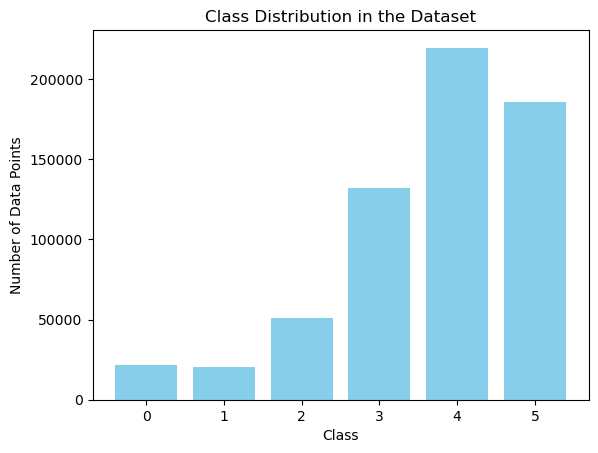

In [5]:
# Assuming 'y' contains the class labels in your dataset
unique_classes, class_counts = np.unique(data['rating'], return_counts=True)

# Bar plot
plt.bar(unique_classes, class_counts, color='skyblue')
plt.xlabel('Class')
plt.ylabel('Number of Data Points')
plt.title('Class Distribution in the Dataset')
plt.xticks(unique_classes)  # Ensure all classes are on the x-axis
plt.show()

In [8]:
#Using stopwords,lemmatizer preprocessing the text data
stop_words= stopwords.words("english")
lem=WordNetLemmatizer()
df=text_preprocess(stop_words,lem,data)

In [9]:
df

,user_id,book_id,review_id,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments,rating
0,d9a0f14b836e2634b89a6a7d4d9aa184,23308084,7bde8725cbb9ceb697c72c12262dff53,My complaint isnt trilogyI want Fantastic end...,Thu Jul 23 22:27:34 -0700 2015,Wed May 04 20:04:40 -0700 2016,Wed May 04 00:00:00 -0700 2016,Mon Apr 25 00:00:00 -0700 2016,1,1,5
1,3af7e1cda1d80d6a6d73e06eab301368,23310751,a9aa8356ef1ca470c98712e17005517b,read 2 day ago remember nothing disappointing,Thu Oct 13 19:33:58 -0700 2016,Thu Oct 13 19:34:28 -0700 2016,Mon Oct 10 00:00:00 -0700 2016,NaN,3,0,2
2,dd669721e136c1be47d739b14fa23d20,210252,8739baeb543858142605442041d79524,I wasnt fan first Monster Blood second additi...,Thu Feb 27 01:44:54 -0800 2014,Sun Oct 18 20:46:53 -0700 2015,Thu Feb 27 00:00:00 -0800 2014,NaN,0,0,2
3,aec624fd1ad0034f2553b7dc55ee1cd0,472392,1791472bb94c9733802303ecf34d9c53,Love Theo much The interaction brother absolu...,Sun Aug 28 08:19:18 -0700 2016,Sat Sep 03 17:42:00 -0700 2016,Fri Sep 02 03:12:59 -0700 2016,Sun Aug 28 00:00:00 -0700 2016,0,0,4
4,d67aef0988e1814a819259eb11c92788,17675462,d98212782db1271607a94c5836ef6189,good book get middle part looking forward rea...,Mon Jan 11 07:20:47 -0800 2016,Mon Mar 14 07:30:27 -0700 2016,Sun Mar 13 00:00:00 -0800 2016,Mon Jan 11 00:00:00 -0800 2016,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...
629995,34d07fb9e04bfbbb17371435223b120e,296182,3de0c7af9700e937b488e129ca3c9cc9,edit 112613 My advice regarding Vorkosigan Sa...,Sat Jul 06 23:27:10 -0700 2013,Thu Jul 10 23:35:49 -0700 2014,NaN,NaN,8,3,4
629996,c3d7ca2c133140d684ab4d958d5e4ee9,5776788,96a1196bfce7fc2d4d4e589d990badc9,This book I would likely picked read I got vi...,Tue Oct 19 17:38:21 -0700 2010,Wed Dec 22 09:46:33 -0800 2010,Tue Dec 21 00:00:00 -0800 2010,Sat Dec 18 00:00:00 -0800 2010,0,0,3
629997,60982541be85a0611e9634b4f63d0cb0,3648,a857718ca7e70b8c0ffc5ead14512fb8,This book summary boast spectacular story wri...,Thu Jun 08 22:25:07 -0700 2017,Thu Jun 08 22:28:54 -0700 2017,Fri Jun 09 07:16:37 -0700 2017,NaN,13,0,2
629998,b43eaf1760e1b11bc224815a3f3c48a3,13507212,393045562fb081cf0a6975a2f6b91908,Excellent sequel Wolf Hall covering shorter p...,Sun Jan 08 08:38:38 -0800 2017,Sun Jan 15 06:16:15 -0800 2017,NaN,NaN,0,0,5


In [10]:
# Save the pre-processed data in csv file
df.to_csv("./train_preprocessed_v2.csv")

In [11]:
# following is for preprocessing test data

In [12]:
t_data=pd.read_csv("./test.csv")
t_data.head()


,user_id,book_id,review_id,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments
0,718b567507be85b2725184ad20fda10b,18966819,583b1ad3d3ab9b0f967bc73c2f5d68d8,Cliffhanger! I'm really enjoying this series.,Mon Aug 24 14:29:33 -0700 2015,Tue Nov 10 20:39:11 -0800 2015,NaN,NaN,2,0
1,874507ab349b2258eaecd967f4573c00,21798646,e53e941fb1bd2f76fb270cedbb1479b8,"Loved, loved, loved. \n Coherent thoughts comi...",Wed Sep 03 05:55:12 -0700 2014,Wed Sep 03 10:45:09 -0700 2014,Wed Sep 03 10:45:09 -0700 2014,Wed Sep 03 00:00:00 -0700 2014,0,0
2,0f60dc9b494a4fd2346b847c5fe71c2d,12983100,e2ab3d609db0a5c7aaed9ee136073c53,The first half was a little slow maybe because...,Sat Mar 01 07:26:43 -0800 2014,Tue Mar 18 01:34:08 -0700 2014,Fri Mar 14 00:00:00 -0700 2014,Sat Mar 01 00:00:00 -0800 2014,0,0
3,06a69afa62684fe2f2576c3995bd725a,2657,740ebae0f5b7fd0b7c9890ef306099f6,"This was one of the few ""assigned"" books that ...",Sat Nov 13 00:43:11 -0800 2010,Sat Nov 13 01:18:27 -0800 2010,NaN,NaN,0,0
4,13531375580eb87a50cb211fada64603,15507958,f4812f3464aaf50d56480025afb22c57,"2.5 stars, rounding down. \n I liked this book...",Wed Apr 29 04:21:13 -0700 2015,Tue Jun 02 06:15:53 -0700 2015,Wed Apr 29 05:19:01 -0700 2015,NaN,3,0


In [15]:
#preprocessing the test data

tdf=text_preprocess(stop_words,lem,t_data)
tdf

,user_id,book_id,review_id,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments
0,718b567507be85b2725184ad20fda10b,18966819,583b1ad3d3ab9b0f967bc73c2f5d68d8,Cliffhanger Im really enjoying series,Mon Aug 24 14:29:33 -0700 2015,Tue Nov 10 20:39:11 -0800 2015,NaN,NaN,2,0
1,874507ab349b2258eaecd967f4573c00,21798646,e53e941fb1bd2f76fb270cedbb1479b8,Loved loved loved Coherent thought coming Friday,Wed Sep 03 05:55:12 -0700 2014,Wed Sep 03 10:45:09 -0700 2014,Wed Sep 03 10:45:09 -0700 2014,Wed Sep 03 00:00:00 -0700 2014,0,0
2,0f60dc9b494a4fd2346b847c5fe71c2d,12983100,e2ab3d609db0a5c7aaed9ee136073c53,The first half little slow maybe little angel...,Sat Mar 01 07:26:43 -0800 2014,Tue Mar 18 01:34:08 -0700 2014,Fri Mar 14 00:00:00 -0700 2014,Sat Mar 01 00:00:00 -0800 2014,0,0
3,06a69afa62684fe2f2576c3995bd725a,2657,740ebae0f5b7fd0b7c9890ef306099f6,This one assigned book I actually read school...,Sat Nov 13 00:43:11 -0800 2010,Sat Nov 13 01:18:27 -0800 2010,NaN,NaN,0,0
4,13531375580eb87a50cb211fada64603,15507958,f4812f3464aaf50d56480025afb22c57,25 star rounding I liked book well enough sig...,Wed Apr 29 04:21:13 -0700 2015,Tue Jun 02 06:15:53 -0700 2015,Wed Apr 29 05:19:01 -0700 2015,NaN,3,0
...,...,...,...,...,...,...,...,...,...,...
269995,bc1bb3a48bb81ea75a7e451802080ddd,23492613,1bccc443a9a97a3fd0b45646f39b6465,spoiler alert I read I series strong reaction...,Sat May 16 10:59:21 -0700 2015,Sat May 16 11:12:54 -0700 2015,Wed Apr 01 00:00:00 -0700 2015,NaN,3,4
269996,d187362e3c93ffc0158d486a317ac83b,62793,ea52067f73ba6de7563eaf4567d423ef,I thought lovely story romance two Japanese y...,Thu Aug 27 04:04:29 -0700 2015,Thu May 04 10:38:03 -0700 2017,Thu May 04 11:42:00 -0700 2017,Thu Aug 27 00:00:00 -0700 2015,2,0
269997,114ed9310ca0d179fea9bd59785e6e3f,4929,153121e003a1d19db89d45723dd0ad8e,The metaphysical musing character certainly w...,Wed May 29 02:32:01 -0700 2013,Fri Aug 16 05:37:09 -0700 2013,Sun Aug 04 09:29:29 -0700 2013,Fri Jul 26 00:00:00 -0700 2013,0,0
269998,353521b7d7f0772699df2a0e1d7b85d2,17333276,ce89b8c499252125f8983ef04a0d4ad9,Nope fetch isnt going happen I thought I lear...,Fri Mar 04 06:50:48 -0800 2016,Mon May 16 09:39:57 -0700 2016,NaN,Fri Mar 04 00:00:00 -0800 2016,0,2


In [16]:
#saving the preprocessed test data

tdf.to_csv("./test_preprocessed_v2.csv")